In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user",	"Events per session", "Engagement rate", "Event count"]

In [6]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


# Cleaning Data and Data Validation for the Above Data Set

In [7]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged Sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [9]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [10]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

1. # What patterns or trends can you observe in website sessions and users over time ?

In [12]:
sns.set(style="whitegrid")

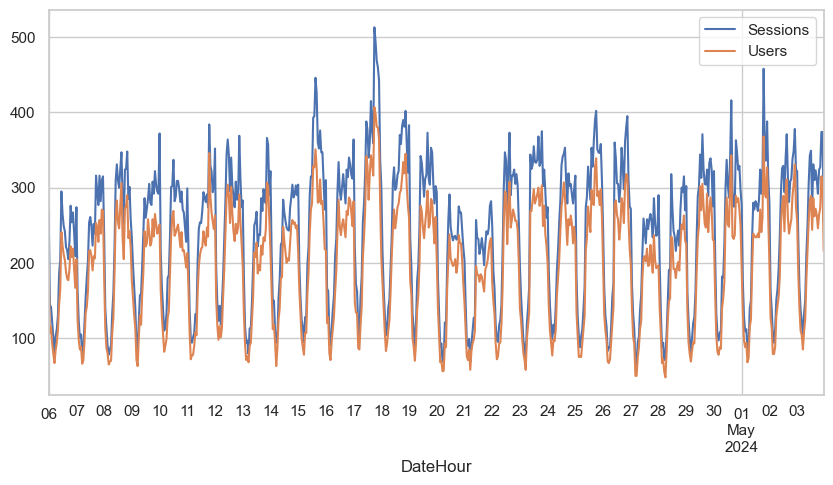

In [14]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.show()

2. # Total Users By Channel

C:\Users\HP\AppData\Local\Temp\ipykernel_11572\1285353002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "channel group", y = "Users", estimator=np.sum, palette="viridis")


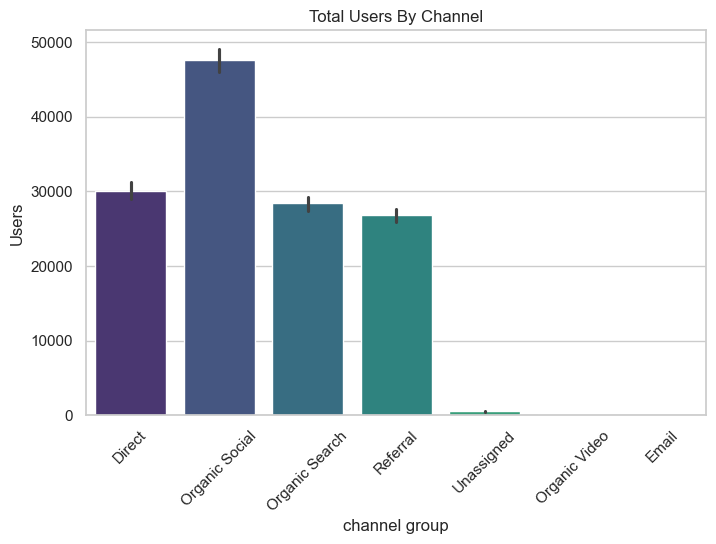

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = "channel group", y = "Users", estimator=np.sum, palette="viridis")
plt.title("Total Users By Channel")
plt.xticks(rotation=45)
plt.show()

1) Organic Social and Direct have brought the highest number of users to their channel, followed by Organic Search and Referral.
2) Using this insights, we can improve traffic from other sources such as Un assigned, Organic Video and Email.

3. # Highest Average Engagement Time by channel

C:\Users\HP\AppData\Local\Temp\ipykernel_11572\2949528989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "channel group", y = "Average engagement time per session", estimator=np.mean, palette="magma")


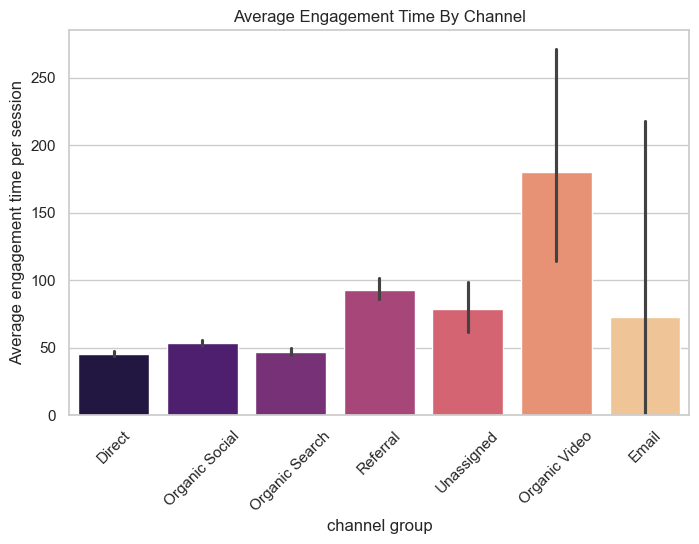

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = "channel group", y = "Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Average Engagement Time By Channel")
plt.xticks(rotation=45)
plt.show()

1) Organic Video channel group has the highest average engagement time per session by users
2) Organic search and Direct channel group has a potential to get better engagement

4. # Engagement rate distribution by channels

C:\Users\HP\AppData\Local\Temp\ipykernel_11572\124375061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "channel group", y = "Engagement rate", palette="coolwarm")


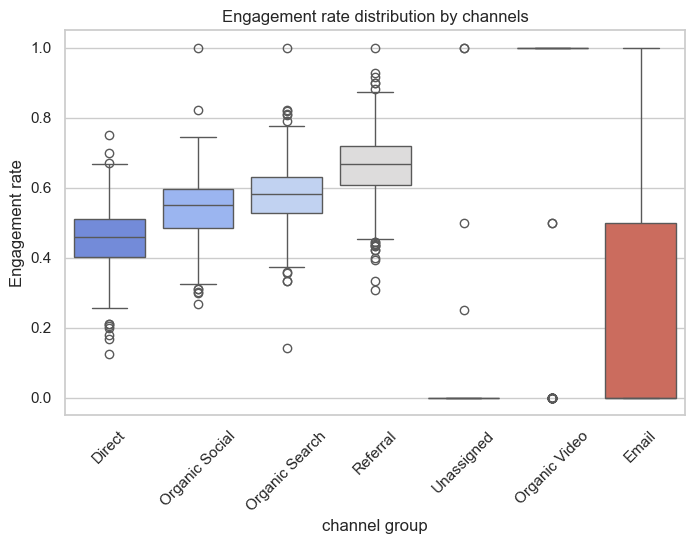

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = "channel group", y = "Engagement rate", palette="coolwarm")
plt.title("Engagement rate distribution by channels")
plt.xticks(rotation=45)
plt.show()

KEY INSIGHTS
1) Referral Traffic is the best performer
2) Organic Search is strong and Consistent

5. # Engaged Sessions Vs Non Engaged Sesssions

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


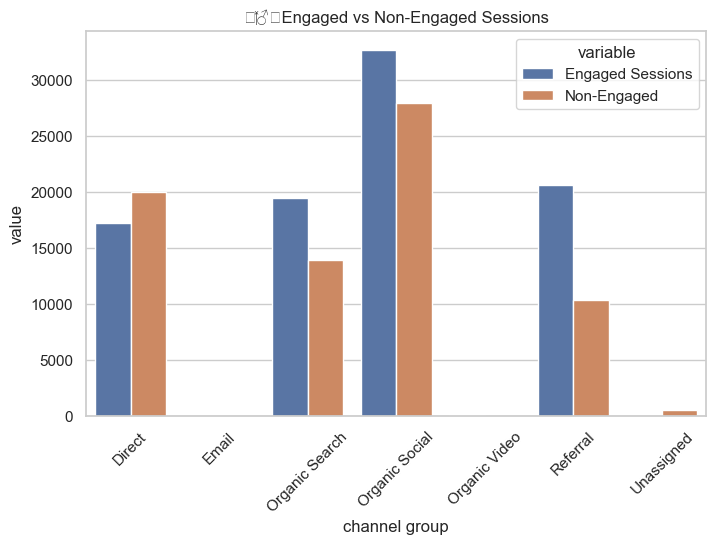

In [29]:
session_df = df.groupby("channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged Sessions", "Non-Engaged"])
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("🧍‍♂️Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

KEY INSIGHTS
1) Direct channels are getting more audience, but it is not upto the mark in containing its audience engaged.
2) Email and Organic Video channels are not getting audience at all. They need to work more on that to improve its users and their Engagement rating.

6. # Traffic By Hour And Channel

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


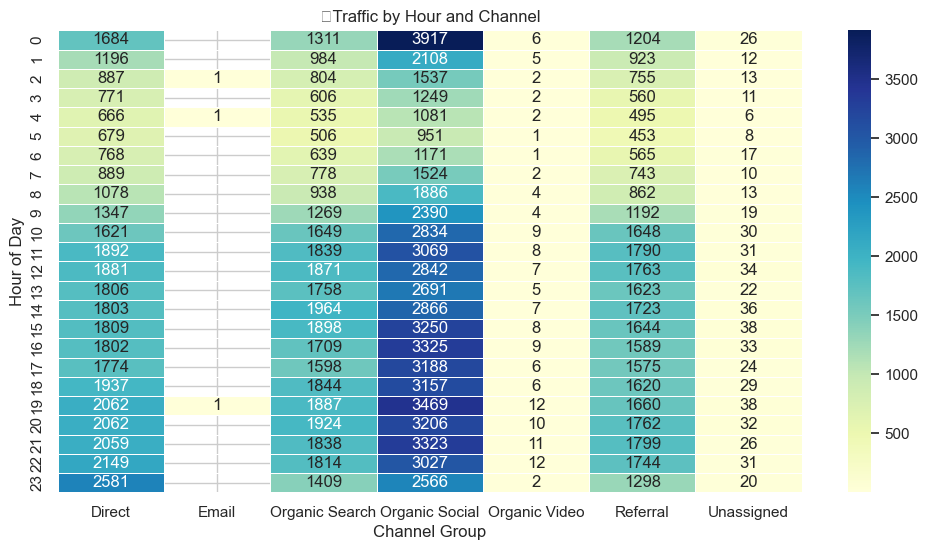

In [31]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("⏰Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

KEY INSIGHTS
1) At 12 A.M Organic Social Channel drives the most traffic(3917)
2) At 11 P.M Direct channel drives the most traffice(2581)
3) At 02 P.M Organic Search Channel drives the most traffice(1964)